# Manual method 

## Importing Libraries 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating Dataset 

In [100]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [101]:
noise = np.random.randn(len(x_data))

In [102]:
noise.shape

(1000000,)

In [103]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

m = 0.5

b = 5 

Gonna add some noise

In [104]:
y_true = (0.5 * x_data) + 5 + noise

## Concantenate the x and y data using pandas 

### Convert the created data into dataframe

In [105]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [106]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [107]:
my_data.head()

,X Data,Y
0,0.00000,4.039603
1,0.00001,4.981975
2,0.00002,4.528053
3,0.00003,6.588136
4,0.00004,5.771473


## Plot a sample of created dataset

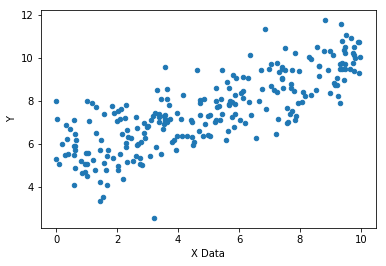

In [108]:
my_data.sample(250).plot(x = 'X Data', y = 'Y', kind = 'scatter')

## Creating our model 

### Defining batch size

~     Batch size - The number of points should undergo training in each iterations.

In [109]:
batch_size = 8

### Creating Slope (m) and intercept (b) 

In [110]:
np.random.randn(2)

array([-0.25713359,  0.79892386])

In [111]:
m = tf.Variable(0.04)

b = tf.Variable(0.06)

In [112]:
xph = tf.placeholder(tf.float32, [batch_size])

yph = tf.placeholder(tf.float32, [batch_size])

In [113]:
y_model = tf.add(tf.multiply(m, xph), b)

In [114]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [161]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

train = optimizer.minimize(error)

### Designing our model

~     Batches - No of batches of data points of the batch_size count is to be processed

In [162]:
batches = 10000

init = tf.global_variables_initializer()

In [163]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(batches):
        
            rand_index = np.random.randint(len(x_data), size = batch_size)
            
            feed = {xph : x_data[rand_index], yph : y_true[rand_index]}
            
            sess.run(train, feed_dict = feed)
    
    
    model_m, model_b = sess.run([m, b])
    

In [164]:
model_m

0.5245182

In [165]:
model_b

5.0670714

In [166]:
y_hat = x_data * model_m + model_b

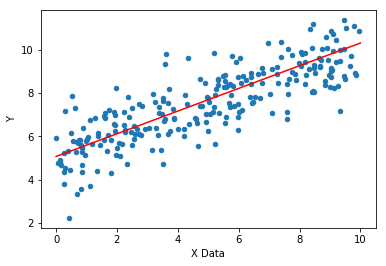

In [167]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

plt.plot(x_data, y_hat, 'r')

# TF Estimator 

## Creating feature columns

~    Feature columns - Our datasets are converted to a format so that estimators can use

In [269]:
feat_cols = [tf.feature_column.numeric_column('x', shape = [1])]

print (feat_cols)

[_NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Instantiating the Estimator 

In [270]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5aq7ywvu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3779860e10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Importing Train Test Split 

In [271]:
from sklearn.model_selection import train_test_split

## Splitting our dataset 

In [272]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 152)

In [273]:
x_train.shape

(700000,)

In [274]:
x_eval.shape

(300000,)

In [275]:
y_train.shape

(700000,)

In [276]:
y_eval.shape

(300000,)

## Creating an input function for estimator 

~ We can give the input data as numpy array or Pandas Dataframe too. TF Estimator API has methods for both options

In [277]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,
                                                batch_size = 8, num_epochs =None, shuffle = True)

In [278]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train,
                                                      batch_size = 8, num_epochs = 1000, shuffle = False)

In [279]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size = 8, num_epochs = 1000, 
                                                shuffle = False)

## Note:

~  batch_size - No of data for each batch.

~  epochs - No of iterations the model goes through the total dataset provided.

~  1 epoch = The model goes through the total provided dataset completely one time.

~  num_epochs - No of epochs the model should undergo.

~  Steps - No of times the batches should undergo training

    Eg: If the total dataset count is 10000
    
        Batch size = 10
        
        No of batch = 10000 / 10 = 1000
        
        Therefore there are 1000 steps in an epoch. An epoch should undergo 1000 steps to complete the dataset 
        of length 10000 of batch size 10
        

## Train the estimator 

In [280]:
estimator.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5aq7ywvu/model.ckpt.
INFO:tensorflow:loss = 541.48804, step = 1
INFO:tensorflow:global_step/sec: 1024.51
INFO:tensorflow:loss = 20.95916, step = 101 (0.098 sec)
INFO:tensorflow:global_step/sec: 1347.63
INFO:tensorflow:loss = 5.607445, step = 201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1245.11
INFO:tensorflow:loss = 52.555622, step = 301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1286.61
INFO:tensorflow:loss = 5.7208595, step = 401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1328.8
INFO:tensorflow:loss = 9.235172, step = 501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1273.14
INFO:tensorflow:loss = 6.2773075, step = 601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1309.09
INFO:tensorflow:loss

## Train metrics


    ~ Metrics for the training data in the estimator

    ~ i.e., loss, avg loss, label mean, global step etc., for the training data in a estimator

In [281]:
train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-14-09:20:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5aq7ywvu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-14-09:20:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0797923, global_step = 1000, label/mean = 7.5139694, loss = 8.638338, prediction/mean = 7.341343
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

## Eval metrics 

    ~ Metrics for the testing data in the estimator

    ~ i.e., loss, avg loss, label mean, global step etc., for the testing data in a estimator

In [282]:
eval_metrics = estimator.evaluate(input_fn = eval_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-14-09:20:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5aq7ywvu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-14-09:20:29
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1009388, global_step = 1000, label/mean = 7.543831, loss = 8.80751, prediction/mean = 7.3510633
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

## Comparison of metrics 

In [283]:
print("Train metrics")
print(train_metrics)
print("\nEval metrics")
print(eval_metrics)

Train metrics
{'average_loss': 1.0797923, 'label/mean': 7.5139694, 'loss': 8.638338, 'prediction/mean': 7.341343, 'global_step': 1000}

Eval metrics
{'average_loss': 1.1009388, 'label/mean': 7.543831, 'loss': 8.80751, 'prediction/mean': 7.3510633, 'global_step': 1000}


## Note:

~ If the loss in training data is low and loss in testing data is high, then our training data is overfit to the model

~ If both loss are similar, then our model is normal

## Predict the value 

In [284]:
brand_new_data = np.linspace(0, 10, 10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle = False)

print (brand_new_data)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


In [285]:
estimator.predict(input_fn = input_fn_predict)

<generator object Estimator.predict at 0x7f377701d678>

In [286]:
predictions = []
for pred in estimator.predict(input_fn = input_fn_predict):
    
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5aq7ywvu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Plot the predicted output against the original plot 

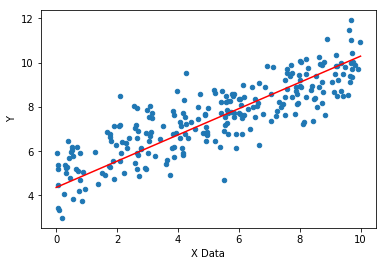

In [287]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')

plt.plot(brand_new_data,predictions,'r')